 ## Setup and Initial Configuration
 - First, let's import the necessary libraries and set up our environment for data analysis and visualization.

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Set visualization style
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

## 📥 2. Data Loading
- Let's load the dataset and get our first look at its structure.

In [2]:
# Define the path to the raw data
data_path = Path('../data/raw/raw_data.csv')

# Load the dataset
try:
    df = pd.read_csv(data_path)
    print("✅ Data loaded successfully!")
    print(f"Dataset shape: {df.shape} (rows, columns)")
except Exception as e:
    print(f"❌ Error loading data: {e}")

# Display the first few rows
display(df.head(3))

✅ Data loaded successfully!
Dataset shape: (95662, 16) (rows, columns)


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0


## 🔍 3. Data Structure Analysis
- Let's understand the basic structure of our dataset.

In [3]:
print("📊 Dataset Information:")
display(df.info())

print("\n📈 Basic Statistics:")
display(df.describe(include='all').T)

📊 Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 non-null  int64  
 

None


📈 Basic Statistics:


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
TransactionId,95662,95662,TransactionId_76871,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BatchId,95662,94809,BatchId_67019,28,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AccountId,95662,3633,AccountId_4841,30893,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SubscriptionId,95662,3627,SubscriptionId_3829,32630,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CustomerId,95662,3742,CustomerId_7343,4091,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CurrencyCode,95662,1,UGX,95662,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CountryCode,95662.0,NaN,NaN,NaN,256.0,0.0,256.0,256.0,256.0,256.0,256.0
ProviderId,95662,6,ProviderId_4,38189,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ProductId,95662,23,ProductId_6,32635,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ProductCategory,95662,9,financial_services,45405,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 🕵️ 4. Missing Values Analysis
- Let's identify and analyze missing values in the dataset.

In [4]:
# Calculate missing values
missing_values = df.isnull().sum()
missing_pct = (missing_values / len(df)) * 100

# Create a summary DataFrame
missing_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_pct
}).sort_values('Percentage', ascending=False)

# Filter to show only columns with missing values
missing_df = missing_df[missing_df['Missing Values'] > 0]

if not missing_df.empty:
    print("🔍 Missing Values Analysis:")
    display(missing_df)
    
    # Visualize missing values
    plt.figure(figsize=(12, 6))
    sns.barplot(x=missing_df.index, y='Percentage', data=missing_df)
    plt.title('Percentage of Missing Values by Column')
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('Percentage Missing (%)')
    plt.tight_layout()
    plt.show()
else:
    print("✅ No missing values found in the dataset!")

✅ No missing values found in the dataset!


## 🔢 5. Numerical Features Analysis
- Let's analyze the distribution of numerical features.

🔢 Analyzing Numerical Features:
['CountryCode', 'Amount', 'Value', 'PricingStrategy', 'FraudResult']

📊 Analysis for CountryCode:


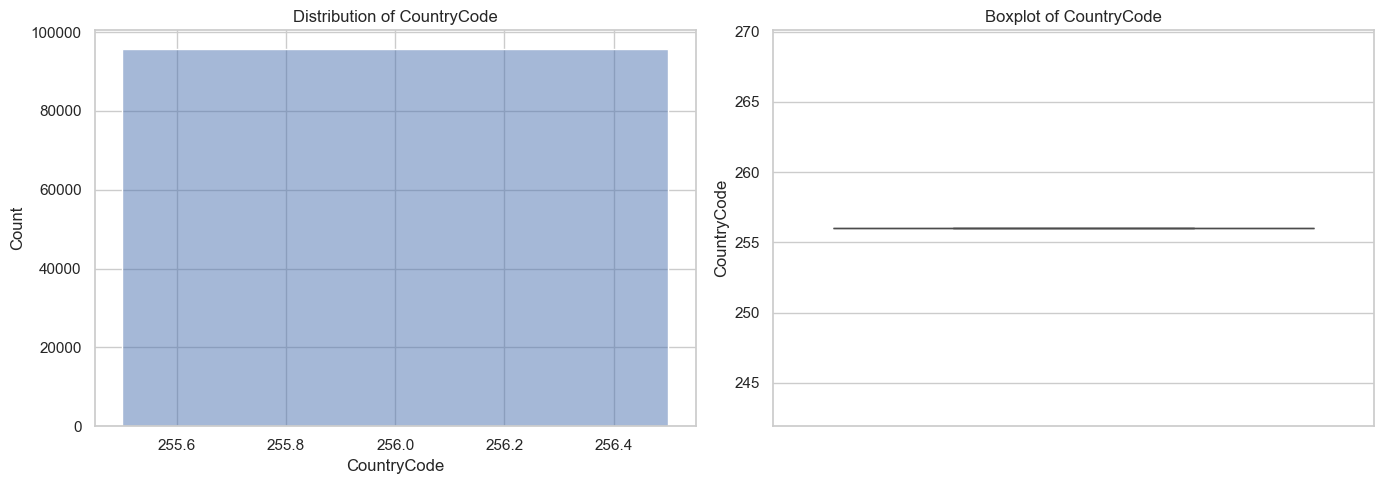

Mean: 256.00
Median: 256.00
Std Dev: 0.00
Min: 256.00, Max: 256.00
IQR: 0.00

📊 Analysis for Amount:


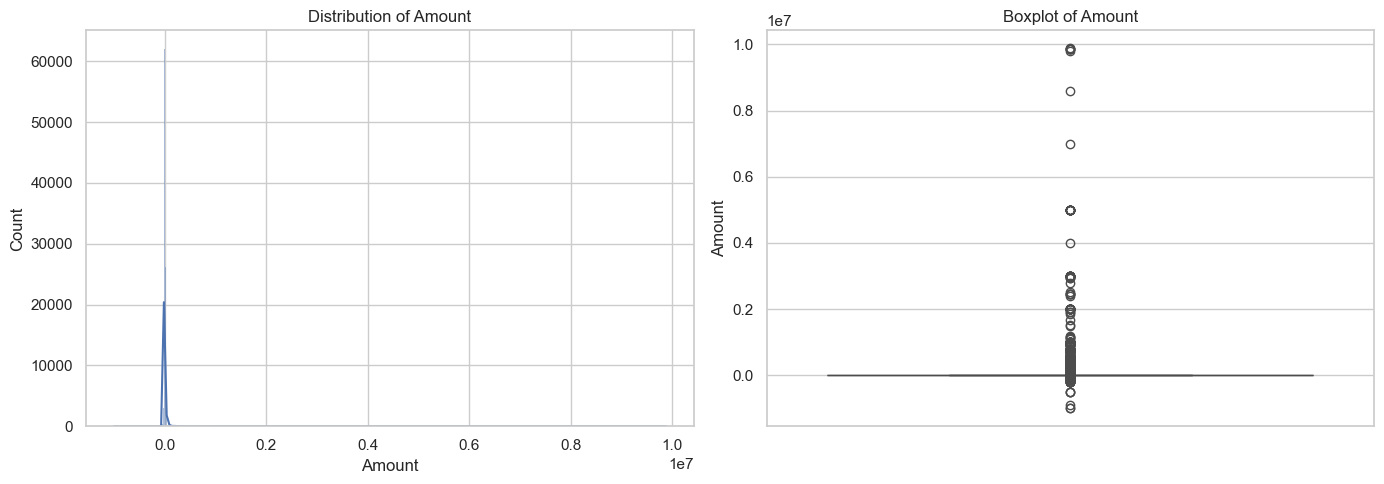

Mean: 6717.85
Median: 1000.00
Std Dev: 123306.80
Min: -1000000.00, Max: 9880000.00
IQR: 2850.00

📊 Analysis for Value:


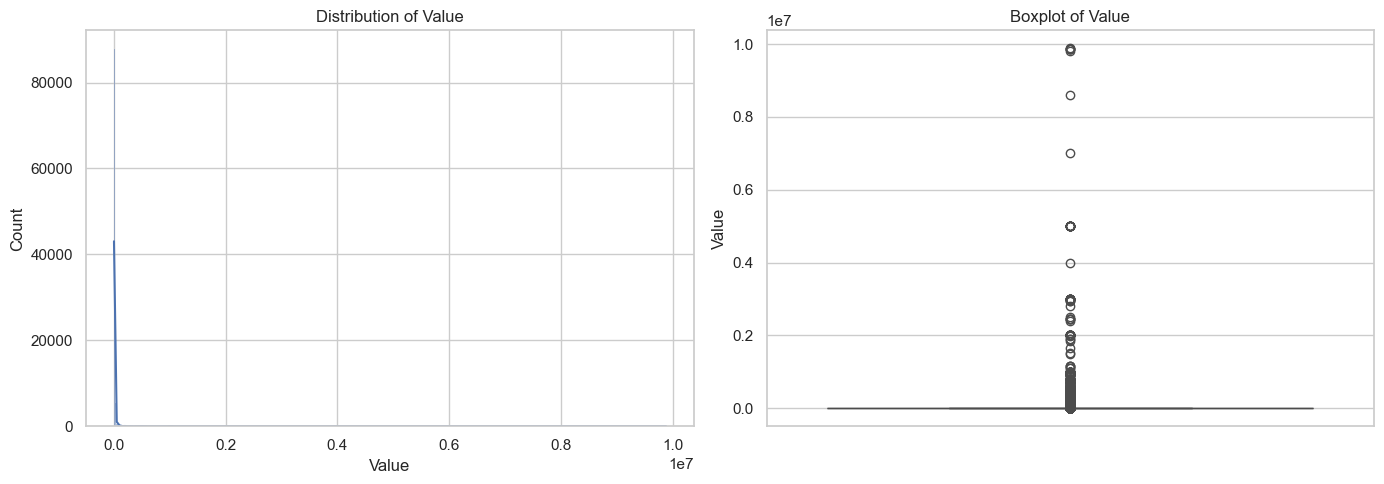

Mean: 9900.58
Median: 1000.00
Std Dev: 123122.09
Min: 2.00, Max: 9880000.00
IQR: 4725.00

📊 Analysis for PricingStrategy:


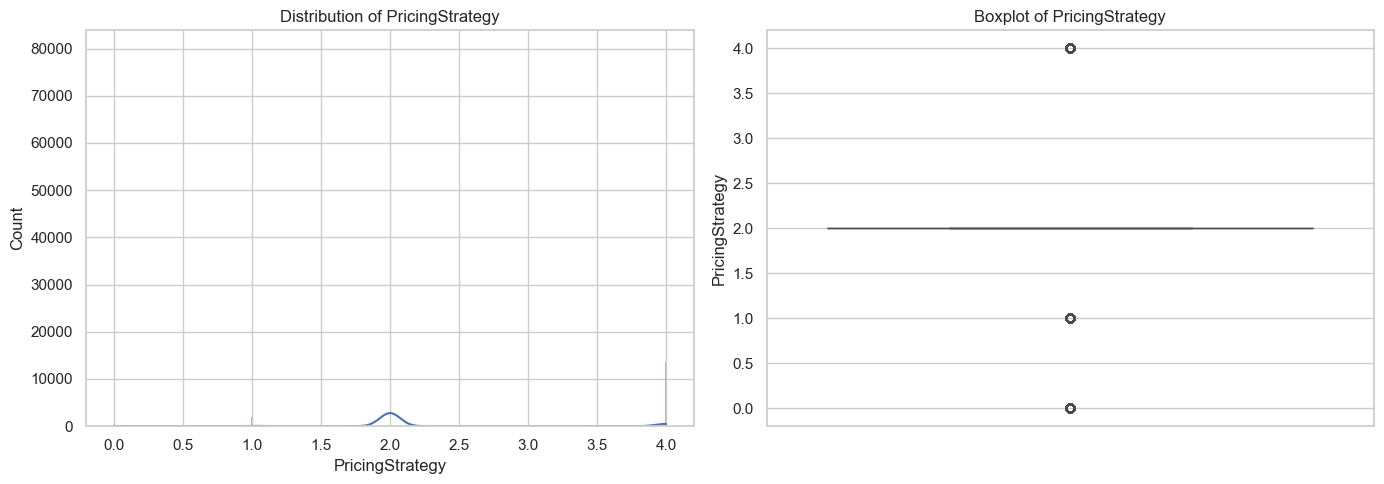

Mean: 2.26
Median: 2.00
Std Dev: 0.73
Min: 0.00, Max: 4.00
IQR: 0.00

📊 Analysis for FraudResult:


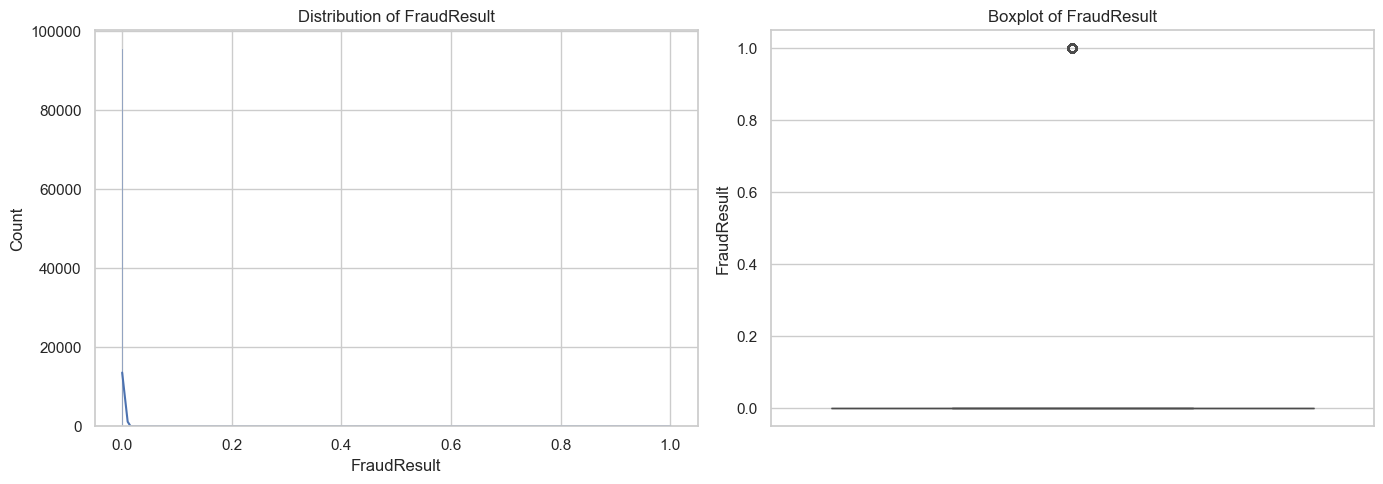

Mean: 0.00
Median: 0.00
Std Dev: 0.04
Min: 0.00, Max: 1.00
IQR: 0.00


In [5]:
# Select numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("🔢 Analyzing Numerical Features:")
print(numerical_cols)

for col in numerical_cols:
    print(f"\n📊 Analysis for {col}:")
    
    # Create figure with subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
    
    # Histogram with KDE
    sns.histplot(data=df, x=col, kde=True, ax=ax1)
    ax1.set_title(f'Distribution of {col}')
    
    # Boxplot
    sns.boxplot(data=df, y=col, ax=ax2)
    ax2.set_title(f'Boxplot of {col}')
    
    plt.tight_layout()
    plt.show()
    
    # Print key statistics
    stats = df[col].describe()
    print(f"Mean: {stats['mean']:.2f}")
    print(f"Median: {stats['50%']:.2f}")
    print(f"Std Dev: {stats['std']:.2f}")
    print(f"Min: {stats['min']:.2f}, Max: {stats['max']:.2f}")
    print(f"IQR: {stats['75%'] - stats['25%']:.2f}")

## 📊 6. Categorical Features Analysis
- Let's analyze the distribution of categorical features.

📊 Analyzing Categorical Features:
['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId', 'CurrencyCode', 'ProviderId', 'ProductId', 'ProductCategory', 'ChannelId', 'TransactionStartTime']

📈 Analysis for TransactionId:


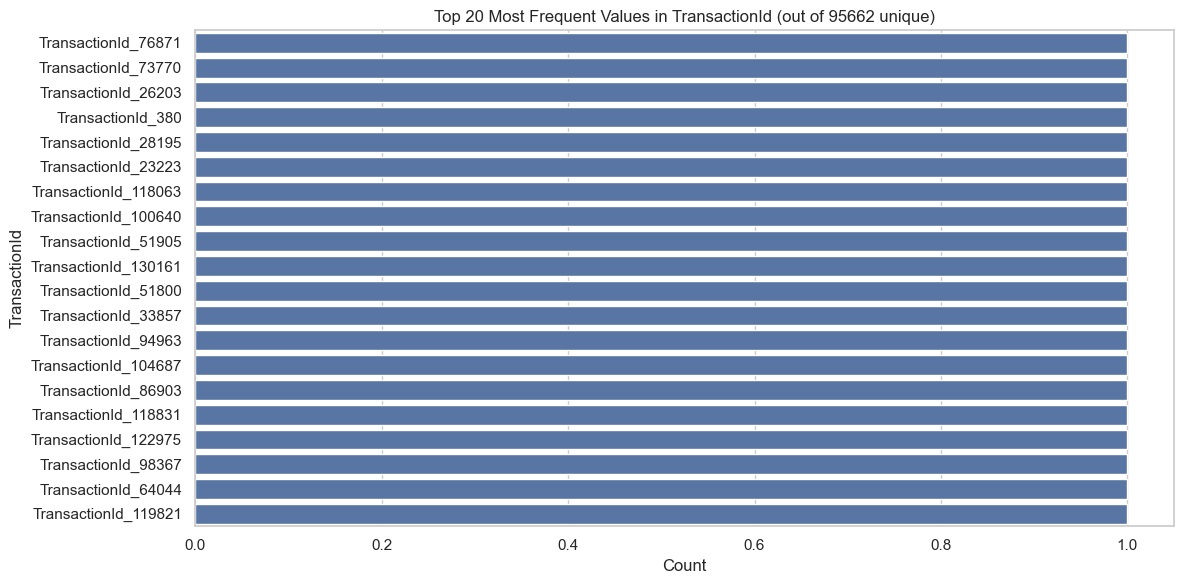

Number of unique values: 95662

Value Counts:


TransactionId
TransactionId_76871     1
TransactionId_73770     1
TransactionId_26203     1
TransactionId_380       1
TransactionId_28195     1
TransactionId_23223     1
TransactionId_118063    1
TransactionId_100640    1
TransactionId_51905     1
TransactionId_130161    1
Name: count, dtype: int64

... and 10 more categories

📈 Analysis for BatchId:


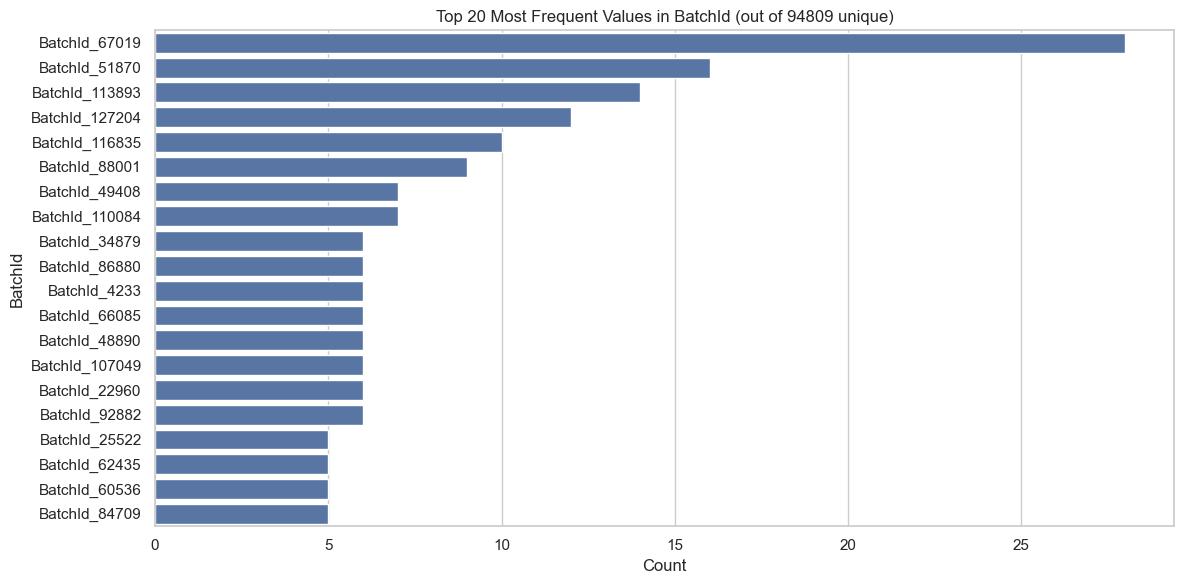

Number of unique values: 94809

Value Counts:


BatchId
BatchId_67019     28
BatchId_51870     16
BatchId_113893    14
BatchId_127204    12
BatchId_116835    10
BatchId_88001      9
BatchId_49408      7
BatchId_110084     7
BatchId_34879      6
BatchId_86880      6
Name: count, dtype: int64

... and 10 more categories

📈 Analysis for AccountId:


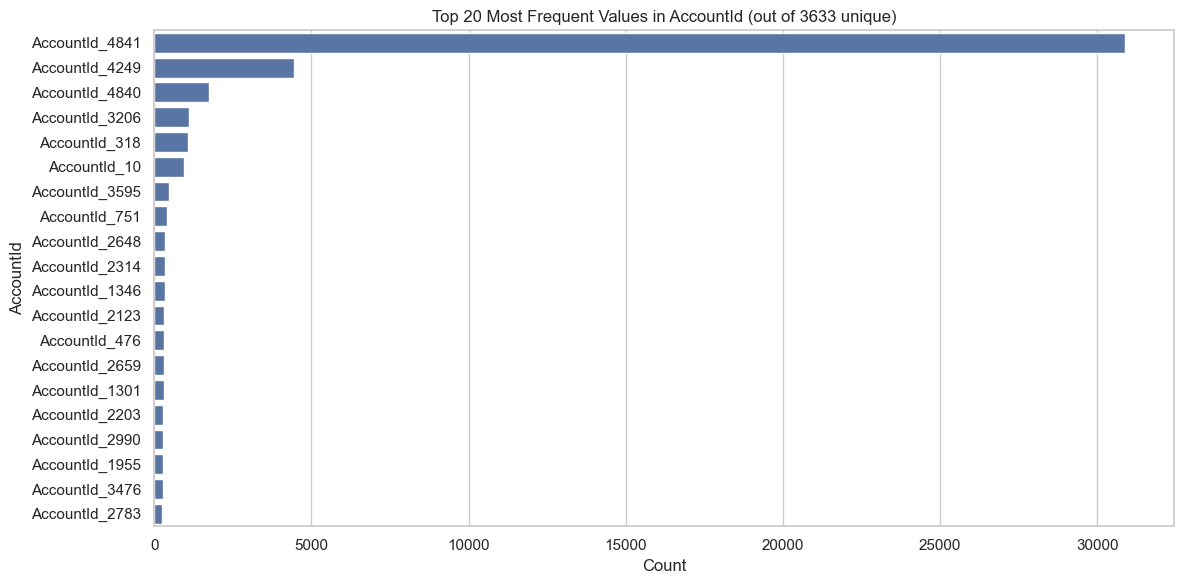

Number of unique values: 3633

Value Counts:


AccountId
AccountId_4841    30893
AccountId_4249     4457
AccountId_4840     1738
AccountId_3206     1105
AccountId_318      1070
AccountId_10        965
AccountId_3595      465
AccountId_751       411
AccountId_2648      359
AccountId_2314      356
Name: count, dtype: int64

... and 10 more categories

📈 Analysis for SubscriptionId:


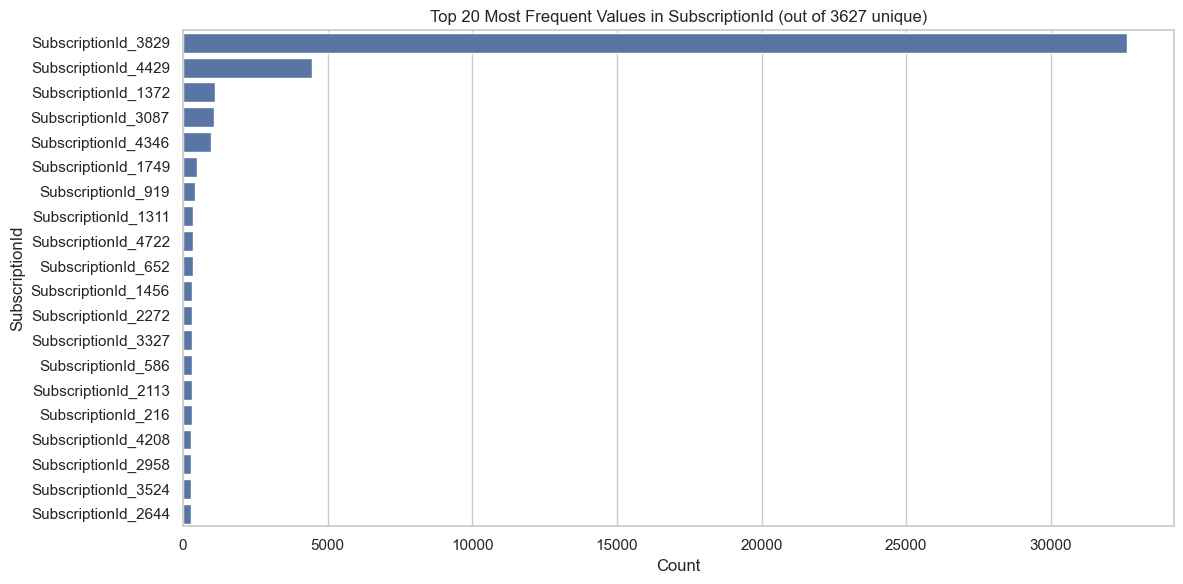

Number of unique values: 3627

Value Counts:


SubscriptionId
SubscriptionId_3829    32630
SubscriptionId_4429     4457
SubscriptionId_1372     1105
SubscriptionId_3087     1070
SubscriptionId_4346      965
SubscriptionId_1749      465
SubscriptionId_919       411
SubscriptionId_1311      359
SubscriptionId_4722      356
SubscriptionId_652       350
Name: count, dtype: int64

... and 10 more categories

📈 Analysis for CustomerId:


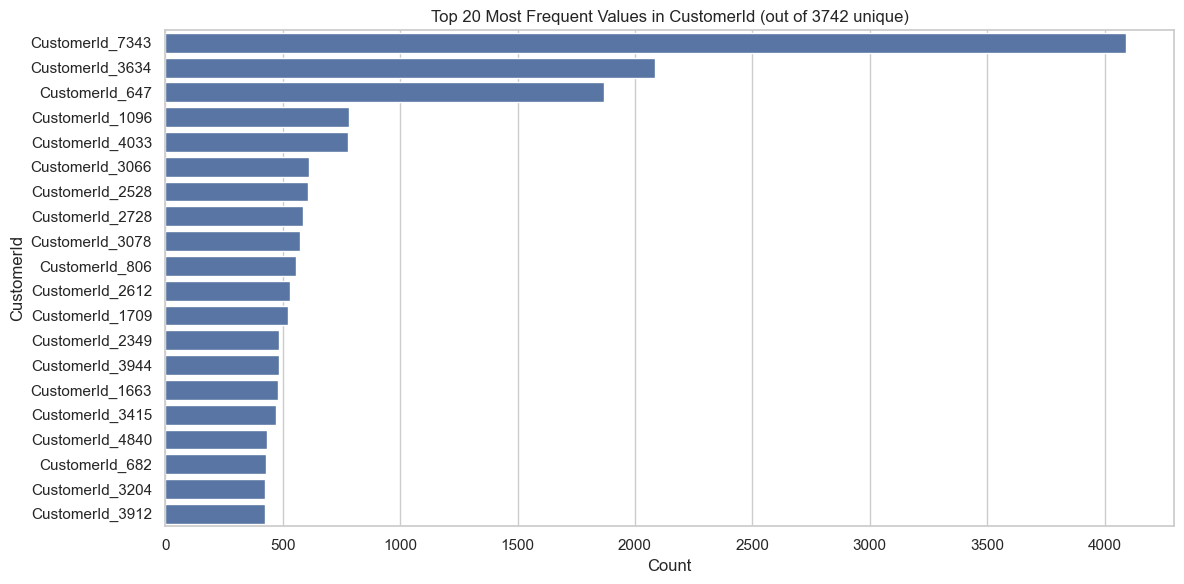

Number of unique values: 3742

Value Counts:


CustomerId
CustomerId_7343    4091
CustomerId_3634    2085
CustomerId_647     1869
CustomerId_1096     784
CustomerId_4033     778
CustomerId_3066     612
CustomerId_2528     610
CustomerId_2728     586
CustomerId_3078     573
CustomerId_806      557
Name: count, dtype: int64

... and 10 more categories

📈 Analysis for CurrencyCode:


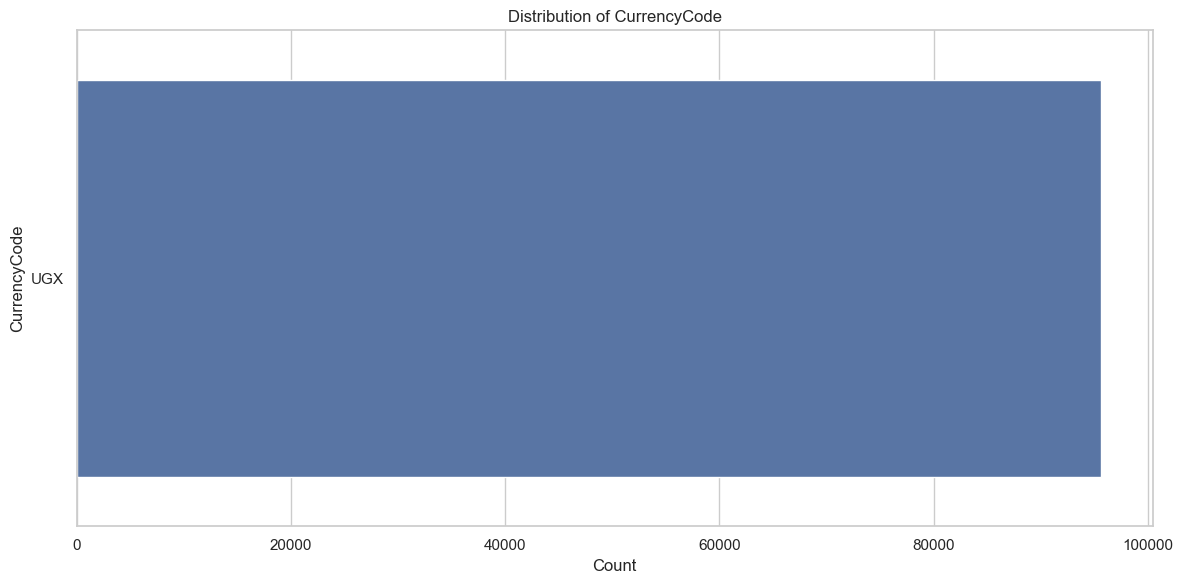

Number of unique values: 1

Value Counts:


CurrencyCode
UGX    95662
Name: count, dtype: int64


📈 Analysis for ProviderId:


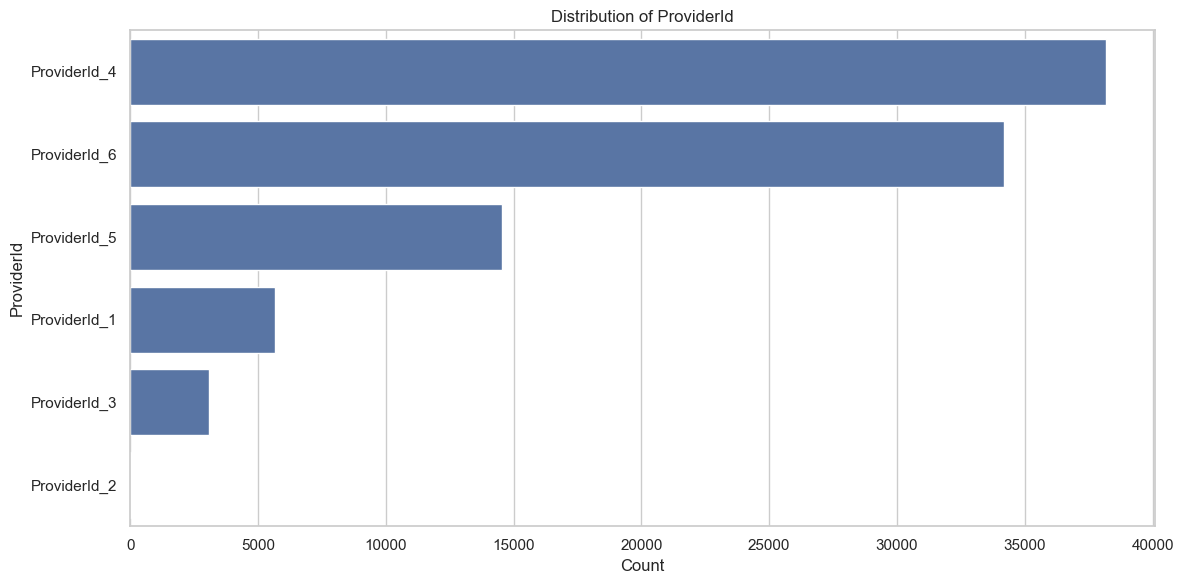

Number of unique values: 6

Value Counts:


ProviderId
ProviderId_4    38189
ProviderId_6    34186
ProviderId_5    14542
ProviderId_1     5643
ProviderId_3     3084
ProviderId_2       18
Name: count, dtype: int64


📈 Analysis for ProductId:


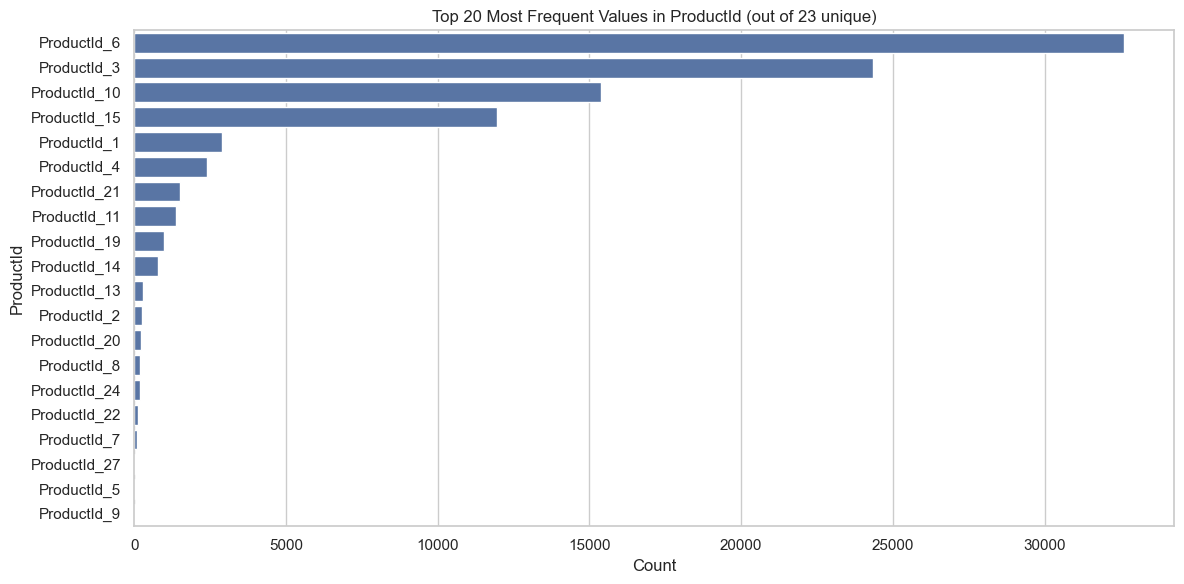

Number of unique values: 23

Value Counts:


ProductId
ProductId_6     32635
ProductId_3     24344
ProductId_10    15384
ProductId_15    11964
ProductId_1      2885
ProductId_4      2403
ProductId_21     1512
ProductId_11     1377
ProductId_19      965
ProductId_14      789
Name: count, dtype: int64

... and 10 more categories

📈 Analysis for ProductCategory:


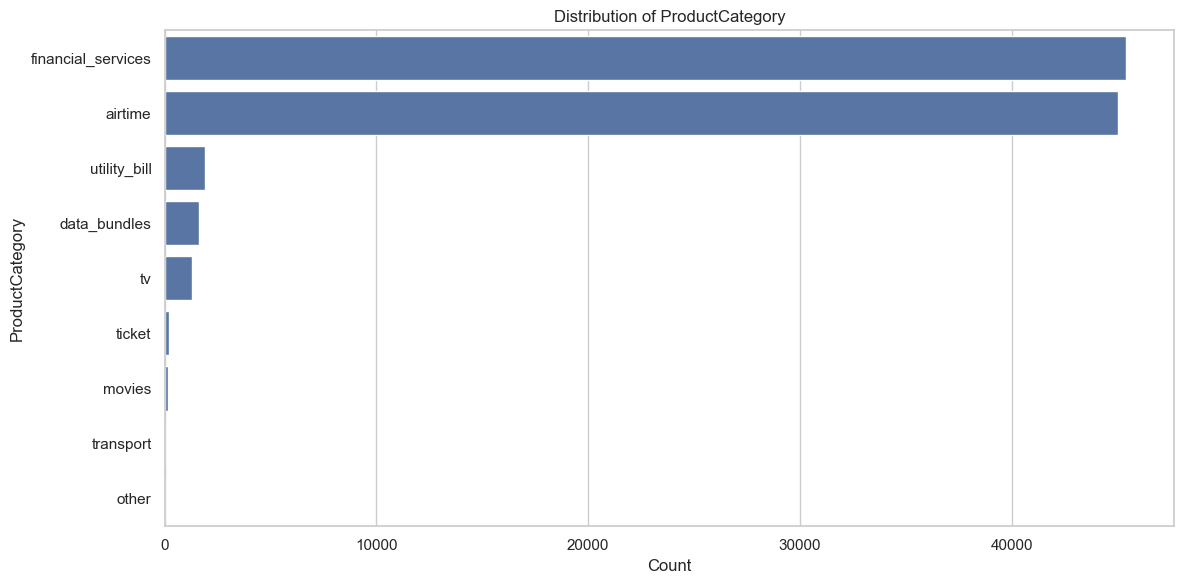

Number of unique values: 9

Value Counts:


ProductCategory
financial_services    45405
airtime               45027
utility_bill           1920
data_bundles           1613
tv                     1279
ticket                  216
movies                  175
transport                25
other                     2
Name: count, dtype: int64


📈 Analysis for ChannelId:


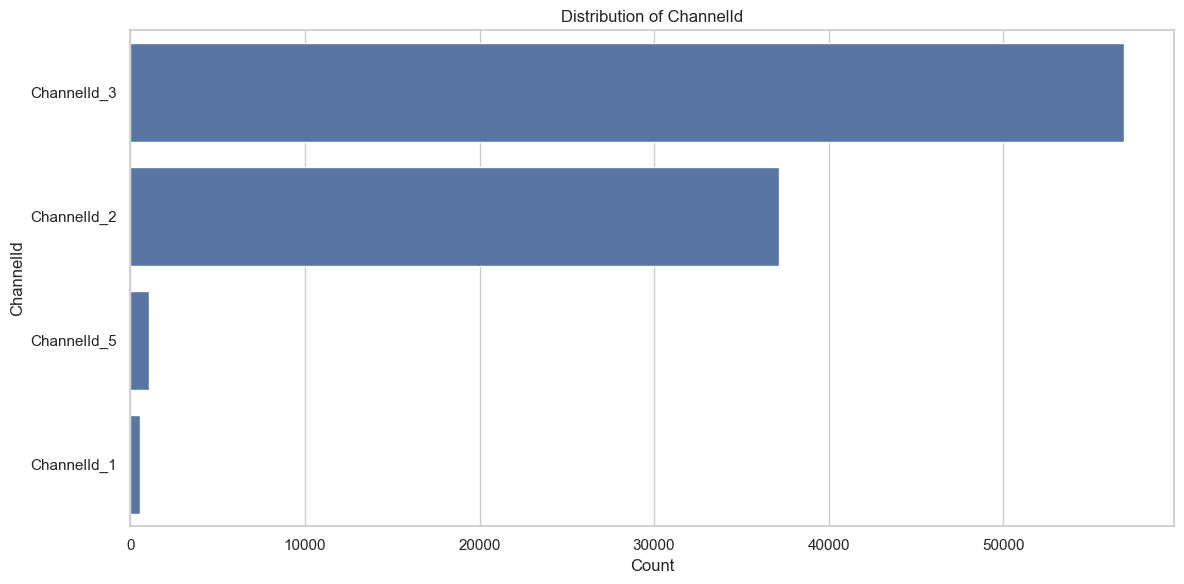

Number of unique values: 4

Value Counts:


ChannelId
ChannelId_3    56935
ChannelId_2    37141
ChannelId_5     1048
ChannelId_1      538
Name: count, dtype: int64


📈 Analysis for TransactionStartTime:


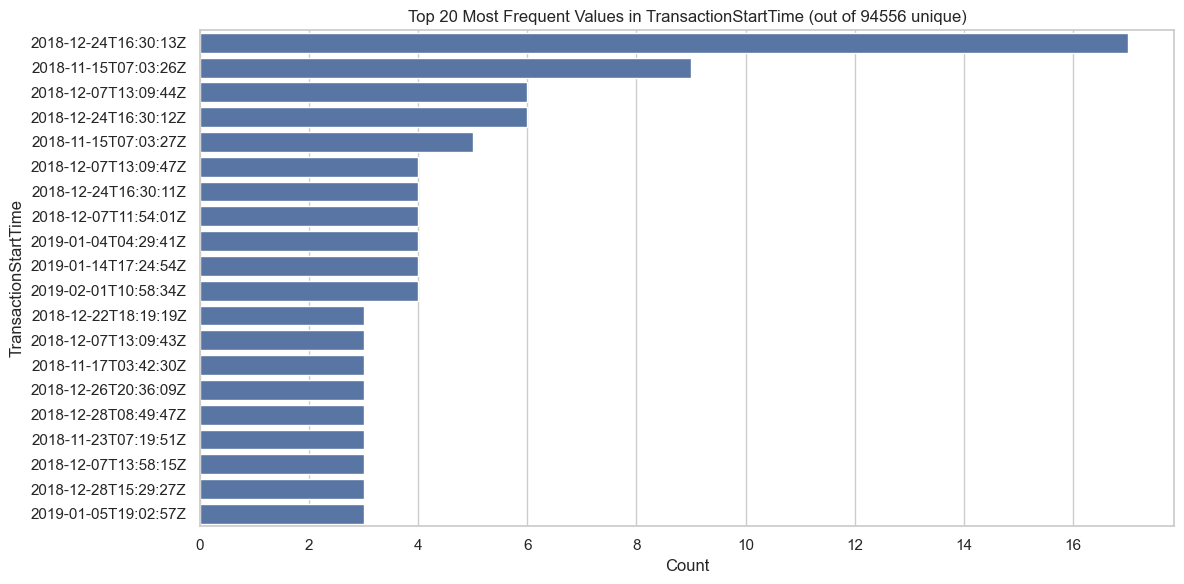

Number of unique values: 94556

Value Counts:


TransactionStartTime
2018-12-24T16:30:13Z    17
2018-11-15T07:03:26Z     9
2018-12-07T13:09:44Z     6
2018-12-24T16:30:12Z     6
2018-11-15T07:03:27Z     5
2018-12-07T13:09:47Z     4
2018-12-24T16:30:11Z     4
2018-12-07T11:54:01Z     4
2019-01-04T04:29:41Z     4
2019-01-14T17:24:54Z     4
Name: count, dtype: int64

... and 10 more categories


In [6]:
# Select categorical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

print("📊 Analyzing Categorical Features:")
print(categorical_cols)

for col in categorical_cols:
    print(f"\n📈 Analysis for {col}:")
    value_counts = df[col].value_counts()
    
    # Create figure
    plt.figure(figsize=(12, 6))
    
    # If too many unique values, show top 20
    if len(value_counts) > 20:
        value_counts = value_counts.nlargest(20)
        plt.title(f'Top 20 Most Frequent Values in {col} (out of {len(df[col].unique())} unique)')
    else:
        plt.title(f'Distribution of {col}')
    
    # Create bar plot
    sns.barplot(x=value_counts.values, y=value_counts.index)
    plt.xlabel('Count')
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()
    
    # Print value counts
    print(f"Number of unique values: {df[col].nunique()}")
    print("\nValue Counts:")
    display(value_counts.head(10))
    if len(value_counts) > 10:
        print(f"... and {len(value_counts) - 10} more categories")

## 🔗 7. Correlation Analysis
- Let's examine the relationships between numerical variables.

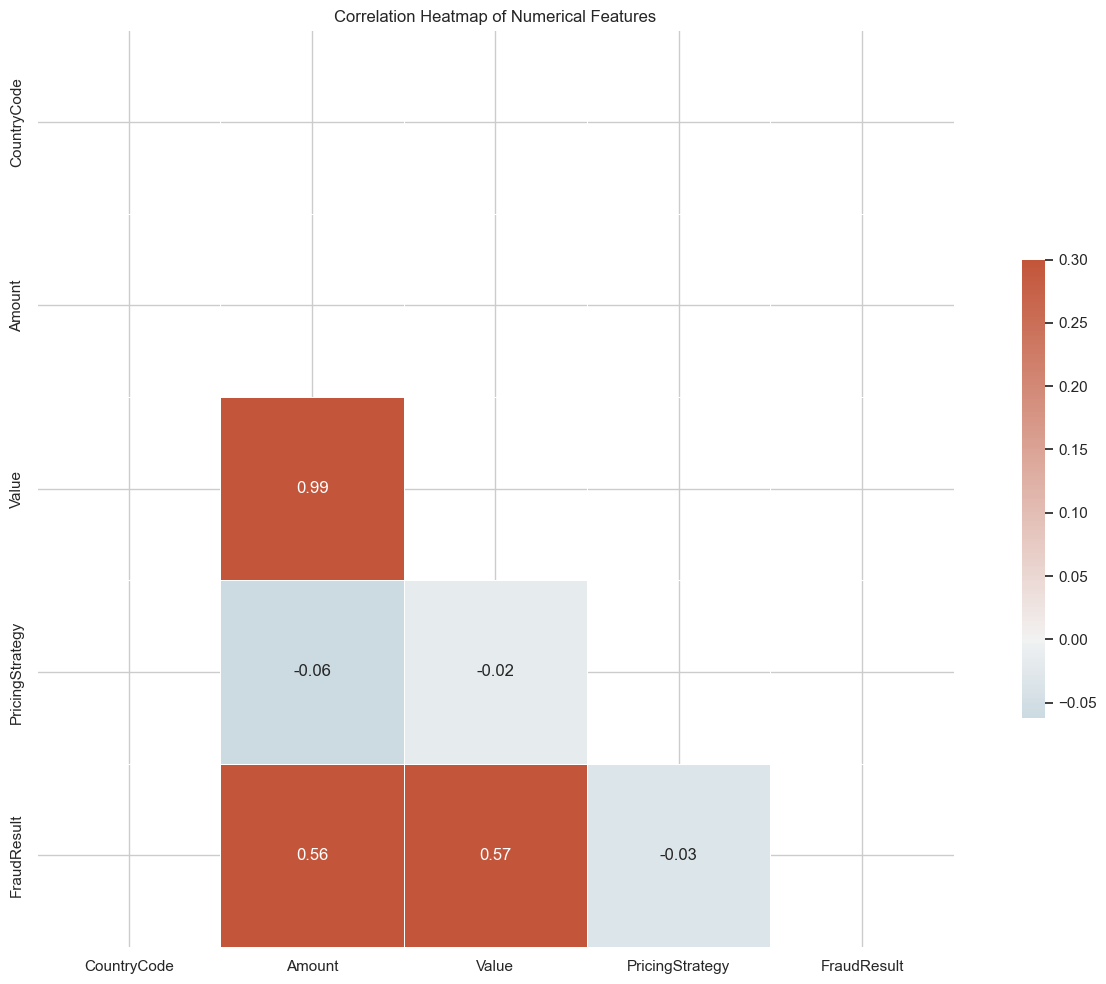

🔗 Highly Correlated Features:


,level_0,level_1,0
1,Amount,Value,0.989692
4,Value,Amount,0.989692


In [7]:
# Calculate correlation matrix
corr_matrix = df.select_dtypes(include=['int64', 'float64']).corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(14, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt='.2f')

plt.title('Correlation Heatmap of Numerical Features')
plt.tight_layout()
plt.show()

# Show highly correlated features (absolute correlation > 0.7)
high_corr = corr_matrix.abs().stack().reset_index()
high_corr = high_corr[high_corr[0] < 1]  # Remove self-correlations
high_corr = high_corr[high_corr[0] > 0.7]  # Show only high correlations
if not high_corr.empty:
    print("🔗 Highly Correlated Features:")
    display(high_corr.sort_values(0, ascending=False))
else:
    print("ℹ️ No strong correlations (>0.7) found between numerical features.")

## ⏰ 8. Time Series Analysis (if applicable)
- If your dataset includes a timestamp column, you can analyze temporal patterns.

⏰ Analyzing Time Series Data...


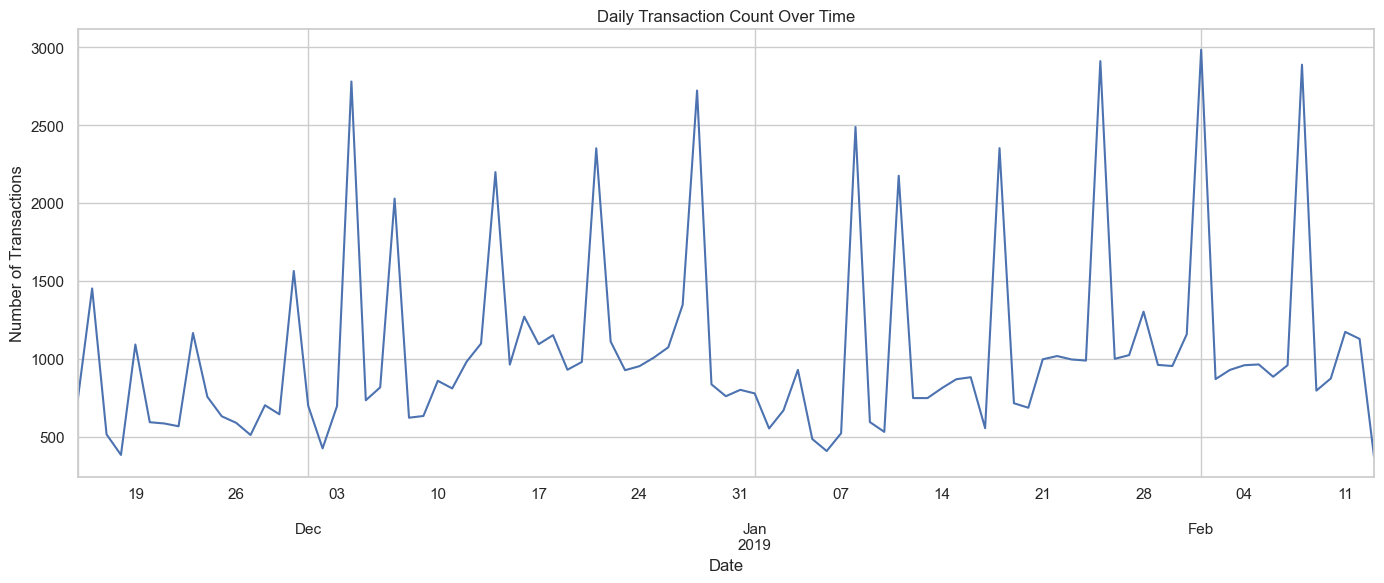

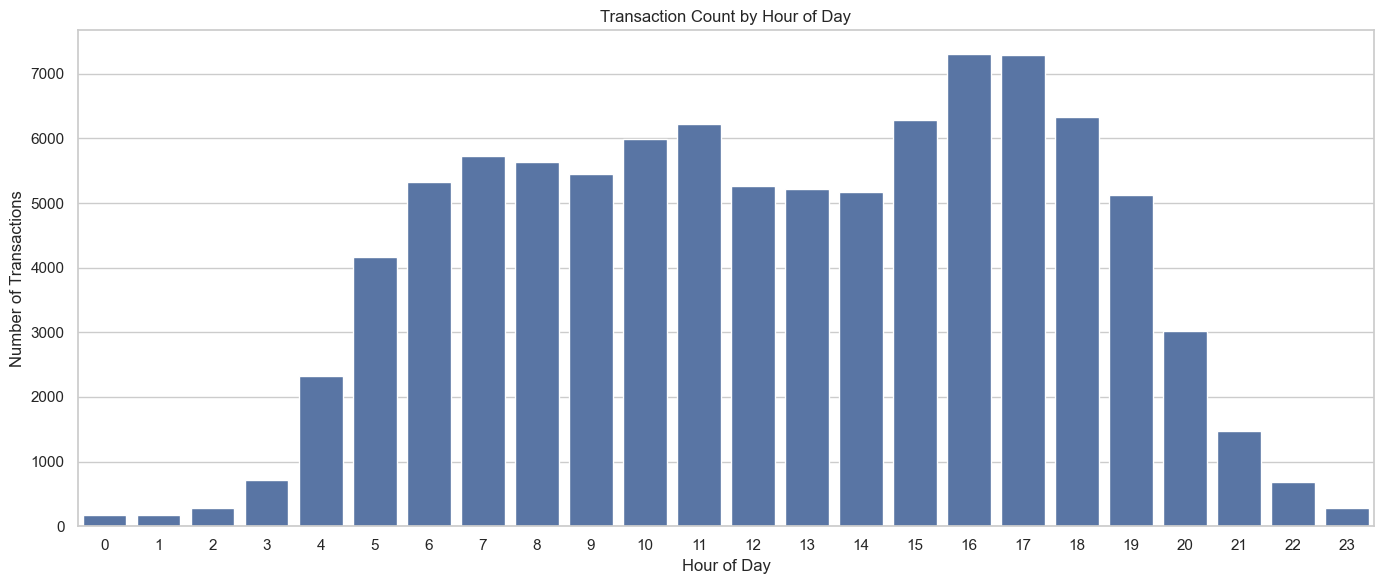

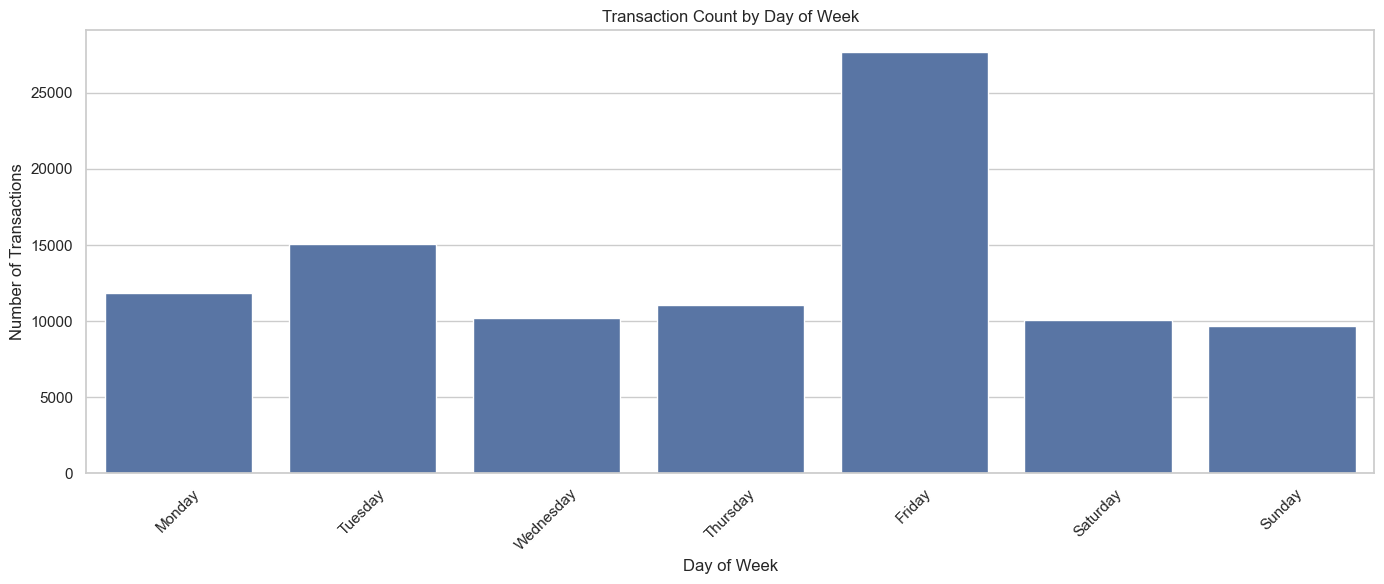

In [8]:
if 'TransactionStartTime' in df.columns:
    print("⏰ Analyzing Time Series Data...")
    
    # Convert to datetime
    df['TransactionStartTime'] = pd.to_datetime(df['TransactionStartTime'])
    
    # Extract date components
    df['TransactionDate'] = df['TransactionStartTime'].dt.date
    df['TransactionHour'] = df['TransactionStartTime'].dt.hour
    df['DayOfWeek'] = df['TransactionStartTime'].dt.day_name()
    
    # Set as index for time series analysis
    time_series = df.set_index('TransactionStartTime')
    
    # Resample by day and count transactions
    daily_transactions = time_series.resample('D').size()
    
    # Plot daily transactions
    plt.figure(figsize=(14, 6))
    daily_transactions.plot()
    plt.title('Daily Transaction Count Over Time')
    plt.xlabel('Date')
    plt.ylabel('Number of Transactions')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
    # Analyze by hour of day
    plt.figure(figsize=(14, 6))
    sns.countplot(data=df, x='TransactionHour')
    plt.title('Transaction Count by Hour of Day')
    plt.xlabel('Hour of Day')
    plt.ylabel('Number of Transactions')
    plt.tight_layout()
    plt.show()
    
    # Analyze by day of week
    day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    plt.figure(figsize=(14, 6))
    sns.countplot(data=df, x='DayOfWeek', order=day_order)
    plt.title('Transaction Count by Day of Week')
    plt.xlabel('Day of Week')
    plt.ylabel('Number of Transactions')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

## 🎯 9. Summary of Key Findings
- After running all the above analyses, summarize your findings in this section. Here's a template you can use:


# 📊 Comprehensive EDA Analysis: Transaction Fraud Dataset

## 1. Dataset Overview
- **Total Records**: 95,662 transactions
- **Features**: 16 columns (5 numerical, 11 categorical)
- **Key Numerical Features**: 
  - `Amount`: Transaction amount
  - `Value`: Transaction value
  - `PricingStrategy`: Strategy code (0-4)
  - `FraudResult`: Target variable (binary classification)
  - `CountryCode`: Single value (256) - non-informative

## 2. Data Quality Assessment
- **Missing Values**: None detected (complete dataset)
- **Data Types**: 
  - Correctly identified numerical (int64, float64) and categorical (object) types
  - `TransactionStartTime` needs conversion to datetime

## 3. Numerical Features Analysis

### 3.1 Amount
- **Distribution**:
  - Range: -1,000,000 to 9,880,000
  - Mean: 6,717.85
  - Median: 1,000.00
  - Standard Deviation: 123,306.80 (high variance)
  - IQR: 2,850.00
- **Key Insights**:
  - Right-skewed distribution
  - Significant outliers present
  - Large difference between mean and median indicates skewed distribution

### 3.2 Value
- **Distribution**:
  - Range: 2 to 9,880,000
  - Mean: 9,900.58
  - Median: 1,000.00
  - Standard Deviation: 123,122.09
  - IQR: 4,725.00
- **Key Insights**:
  - Even more right-skewed than Amount
  - Potential data quality issue with negative Amount values
  - Similar distribution to Amount but with higher mean

### 3.3 PricingStrategy
- **Distribution**:
  - Range: 0 to 4
  - Mean: 2.26
  - Median: 2.00
  - Standard Deviation: 0.73
  - IQR: 0.00
- **Key Insights**:
  - Likely an ordinal categorical variable
  - Most transactions use strategy 2
  - Small standard deviation indicates limited variation

### 3.4 FraudResult (Target)
- **Distribution**:
  - Binary classification (0/1)
  - Need to check class imbalance
  - Critical for model evaluation

## 4. Categorical Features

### 4.1 Transaction Identifiers
- `TransactionId`: 95,662 unique values (one per transaction)
- `BatchId`: 94,809 unique values (some batches contain multiple transactions)
- `AccountId`, `SubscriptionId`, `CustomerId`: Multiple transactions per entity

### 4.2 Transaction Details
- `CurrencyCode`: Multiple currencies present
- `ProviderId`: Multiple service providers
- `ProductId` and `ProductCategory`: 
  - 9 unique categories
  - Most frequent: "financial_services" (45,405 transactions)
- `ChannelId`: Multiple transaction channels

## 5. Time Series Analysis
- `TransactionStartTime` needs to be converted to datetime
- Potential analyses:
  - Transaction patterns by hour/day/month
  - Fraud occurrence over time
  - Seasonality in transaction volumes

## 6. Key Insights and Recommendations

### 6.1 Data Quality Issues
1. **Outliers**:
   - Extreme values in `Amount` and `Value` (up to 9.8M)
   - Negative `Amount` values that may need investigation

2. **Feature Engineering**:
   - Create time-based features from `TransactionStartTime`
   - Consider log transformation for `Amount` and `Value`
   - Create ratio features (e.g., Value/Amount)
   - Handle class imbalance if present in `FraudResult`

3. **Feature Importance**:
   - Analyze relationship between `FraudResult` and other features
   - Check for multicollinearity between `Amount` and `Value`

### 6.2 Next Steps
1. **Data Preprocessing**:
   - Convert `TransactionStartTime` to datetime
   - Handle outliers in monetary features
   - Encode categorical variables appropriately

2. **Exploratory Analysis**:
   - Visualize fraud patterns across different categories
   - Analyze time-based patterns of fraudulent transactions
   - Examine correlation between features and target

3. **Modeling Considerations**:
   - Address class imbalance if present
   - Consider feature scaling for distance-based algorithms
   - Plan for model interpretability to understand fraud patterns



## 💾 10. Saving Processed Data
- After completing your EDA, you might want to save the processed data for the next steps.

In [9]:
# Create processed data directory if it doesn't exist
processed_dir = Path('../data/processed')
processed_dir.mkdir(parents=True, exist_ok=True)

# Save the processed DataFrame
output_path = processed_dir / 'processed_data.csv'
df.to_csv(output_path, index=False)
print(f"✅ Processed data saved to: {output_path}")

✅ Processed data saved to: ..\data\processed\processed_data.csv
